In [1]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set(style="white", color_codes=True)
# sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes='b', rc=None)

In [9]:
def get_friends_ids(user_id):
    """
    this function returns list of friends
    """
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}'
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        return list()
    return json_response[u'response']

In [19]:
def get_friends_info(user_id):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&fields=sex,bdate,city,country' 
    json_response = requests.get(friends_url.format(user_id)).json()
    if json_response.get('error'):
        return list()
    return json_response[u'response']

In [10]:
graph = {}
friend_ids = get_friends_ids(9106204)
for friend_id in friend_ids:
    graph[friend_id] = get_friends_ids(friend_id)
#     print ('Processing id: ', friend_id, len(graph[friend_id]) )

In [11]:
g = networkx.Graph(directed=False)

In [12]:
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

In [13]:
networkx.write_gml(g, "network.gml")

In [14]:
g = nx.read_gml('network.gml')

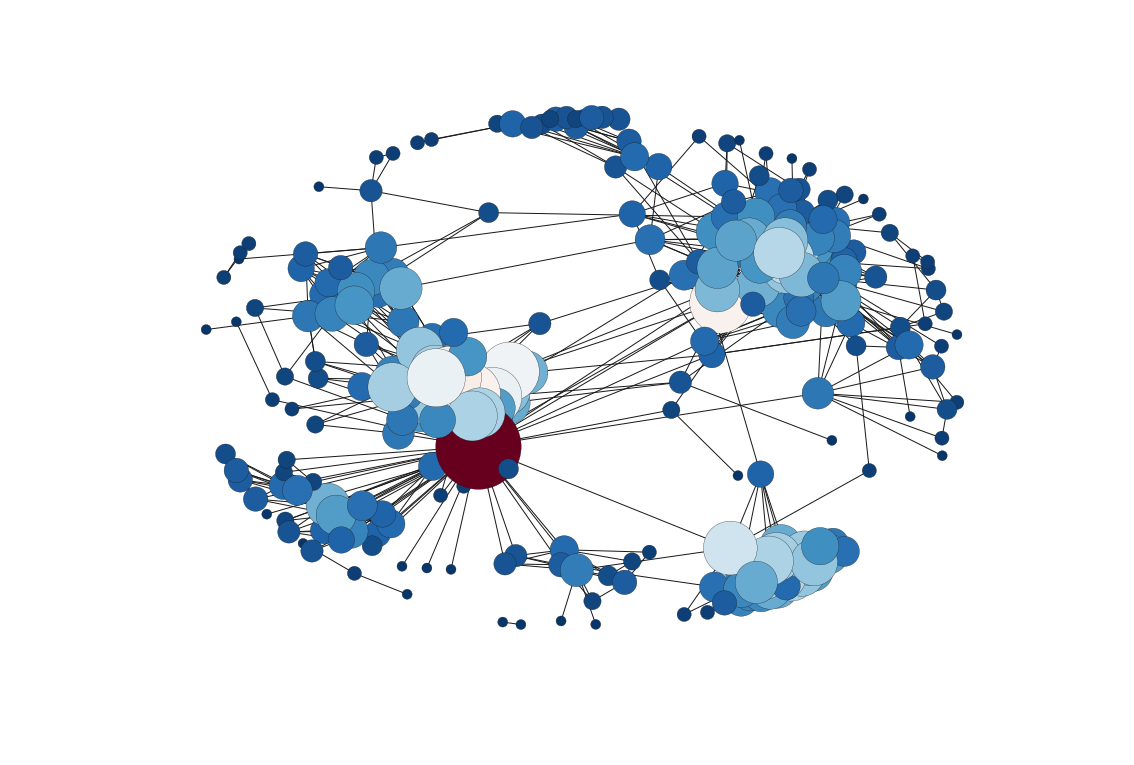

In [16]:
plt.xkcd()
k = nx.degree(g)

plt.figure(1, figsize=(15,10))
coord = nx.spring_layout(g)
# nx.draw_networkx
nx.draw(g,
         pos=coord,
         nodelist=k.keys(),
         node_size = [d*100 for d in k.values()],
         node_color=k.values(),
         font_size=8,
         cmap=plt.cm.get_cmap('RdBu_r'),
         with_labels=False
         )

In [17]:
def print_info_about(id_interest):  
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}'.format(id_interest)).json()[u'response']
    print resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip()

In [18]:
nom=1
# (15239774, 57),
#  (1480611, 60),
#  (11878404, 65),
#  (13900074, 71),
#  (869755, 76),
print_info_about(15239774)
# sorted(k.items(), key=lambda x: x[1])

Anastasia Bushueva
